In [1]:
from collections import defaultdict
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.path import Path
from matplotlib.patches import PathPatch, FancyBboxPatch, FancyArrowPatch
import numpy as np
import scipy.signal as signal
plt.rcParams["figure.figsize"] = (6.4*2,4.8*1.5)
print(plt.rcParams["xtick.labelsize"])
plt.rcParams["font.size"] = 20
from dsp import util
import json

Fs = 150e6/8/256

medium


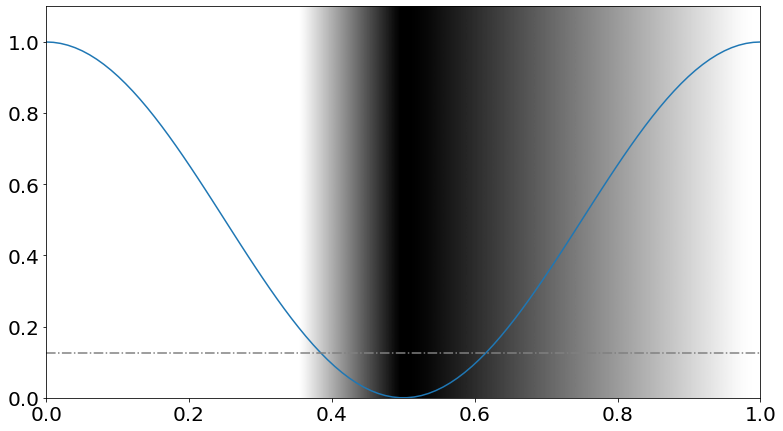

In [2]:
fig, ax = plt.subplots(1)

axi = ax #ax[0]
#axq = ax[1]

t=np.linspace(0,1,100)

lenpert = t.size//8
edge = t[:lenpert]#np.arange(t.size//5)
ceiling = np.full_like(edge, 1.1)
axi.plot(t, 0.5*(1 + np.cos(2*np.pi*t)))

#path = Path(np.array([edge, decay]).transpose())
#patch = FancyBboxPatch( facecolor='none')
#axi.add_patch(patch)

#axi.imshow([np.flip(t[:lenpert])],
                #cmap=plt.cm.Greys,
                #alpha=0.5,
                #interpolation="gaussian",
                #origin='lower',
                #extent=[0,0.4,-0.0,2.1],
                #aspect="auto",
                #clip_on=True)
#axi.imshow([t[:lenpert]],
            #cmap=plt.cm.Greys,
            #interpolation="quadric",
            #origin='lower',
            #extent=[0.9,1,-0.0,2.1],
            #aspect="auto",
            #clip_on=True)
axi.imshow([t[:lenpert]], cmap=plt.cm.gray_r, interpolation="quadric", origin='lower', extent=[0.35,0.5,-0.0,1.1], aspect="auto", clip_on=True)
axi.imshow([t[:lenpert]], cmap=plt.cm.gray, interpolation="quadric", origin='lower', extent=[0.5,1,-0.0,1.1], aspect="auto", clip_on=True)
axi.set_xlim(0, 1)
axi.axhline(0.125, ls = '-.', color = mcolors.CSS4_COLORS["grey"])
#axi.set_xlim(-0.1, 1.1)
##axi.spines.right.set_visible(False)
##axi.spines.top.set_visible(False)

#axi.axvspan(0, 0.02, alpha=0.3)
#axi.axvspan(0.98, 1, alpha=0.3)
#axi.axvspan(0.39, 0.41, alpha=0.4, color='r')
#axi.axvspan(0.59, 0.61, alpha=0.4, color='r')
#axi.axvspan(0.40, 0.6, alpha=0.3, color='r')
#axq.plot(np.sin(2*np.pi*t))

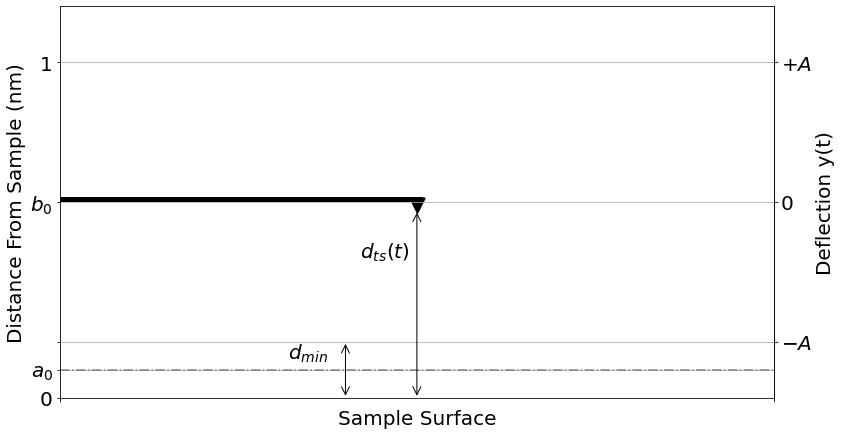

In [6]:
fig, ax = plt.subplots()
#ax.plot(t, 0.5*(1 + np.cos(2*np.pi*t)))
ax2 = ax.secondary_yaxis('right')
#ax2.set_yticks(np.linspace(0, 1, 5), minor=True)
#ax2.set_yticklabels([r'$-A$', r'$-A/2$', r'0', r'$+A/2$', r'$+A$'], minor=True)
ax2.set_yticks(np.linspace(0, 1, 3))
ax2.set_yticklabels([r'$-A$', '0', r'$+A$'])
ax.set_yticks([-0.2, -0.1, 0, 0.5, 1])
ax.set_yticklabels(['0', r'$a_0$', '', r'$b_0$', '1'])
#ax.set_xticks(np.linspace(0, 1, 5), minor=True)
ax.set_xticks(np.linspace(0, 1, 2), minor=False)
#ax.set_xticklabels(['0', '1/4', '1/2', '3/4', '1'], minor=True)
ax.set_xticklabels(['', ''], minor=False)
ax.set_xlabel('Sample Surface')
ax.axhline(0.51, 0, 0.505, linewidth=5, c='black')
ax.scatter((0.5,), (0.49,), s=200, linewidth=2, marker='v', c='black')
#ax.axhline(0.125, ls = '-.', color = mcolors.CSS4_COLORS["grey"])
#arr  = FancyArrowPatch((0.5, 0), (0.5, 0.36))
#arr = ax.arrow(0.5, 0, 0, 0.37,width=0.005, )
#arr.set(dict(arrowstyle='<|-|>'))
#arr.set_arrowstyle()
ax.annotate('', (0.5, -0.2), (0.5, 0.47), arrowprops=dict(arrowstyle='<->'))
ax.annotate('', (0.4, -0.2), (0.4, 0), arrowprops=dict(arrowstyle='<->'))
#ax.annotate('', (0.3, -0.2), (0.3, -0.1), arrowprops=dict(arrowstyle='<->'))
#ax.annotate('', (0.6, 0), (0.6, 0.5), arrowprops=dict(arrowstyle='<->'))
#ax.annotate('', (0.6, 0.5), (0.6, 1), arrowprops=dict(arrowstyle='<->'))
ax.annotate(r'$d_{ts}(t)$', (0.42, 0.3))
ax.annotate(r'$d_{min}$', (0.32, -0.06))
#ax.annotate(r'$a_0$', (0.27, -0.16))
#ax.annotate(r'A', (0.61, 0.75))
#ax.annotate(r'A', (0.61, 0.25))
#ax.add_patch(arr)
#ax.grid(True)
ax2.grid(True)
#ax.spines.top.set_visible(False)
ax.grid(True)
ax.axhline(0.-0.1, ls = '-.', color = mcolors.CSS4_COLORS["grey"])
ax.set_ylim(-0.2, 1.2)
ax.set_xlim(0, 0.7)
ax.set_xbound(0, 1)
ax2.set_ylabel('Deflection y(t)')
ax.set_ylabel('Distance From Sample (nm)')
#ax.set_title('Tip-Sample Coordinate System')
fig.savefig("afmcoord.svg")

(0.0, 1.0)

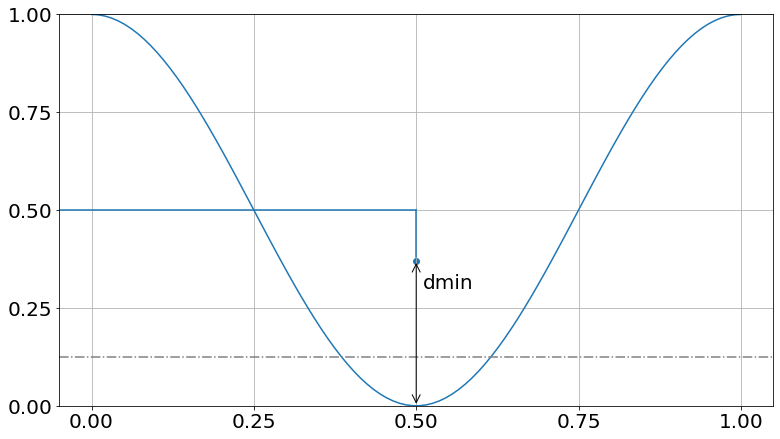

In [7]:
fig, ax = plt.subplots()
ax.plot(t, 0.5*(1 + np.cos(2*np.pi*t)))
ax.set_yticks(np.linspace(0, 1, 5))
ax.set_xticks(np.linspace(0, 1, 5))
ax.axhline(0.5, 0, 0.5)
ax.axvline(0.5, 0.38, 0.50)
ax.scatter((0.5,), (0.37,))
ax.axhline(0.125, ls = '-.', color = mcolors.CSS4_COLORS["grey"])
#arr  = FancyArrowPatch((0.5, 0), (0.5, 0.36))
#arr = ax.arrow(0.5, 0, 0, 0.37,width=0.005, )
#arr.set(dict(arrowstyle='<|-|>'))
#arr.set_arrowstyle()
ax.annotate('', (0.5, 0), (0.5, 0.37), arrowprops=dict(arrowstyle='<->'))
ax.annotate('dmin', (0.51, 0.3))
#ax.add_patch(arr)
ax.grid(True)
ax.set_ylim(0, 1)


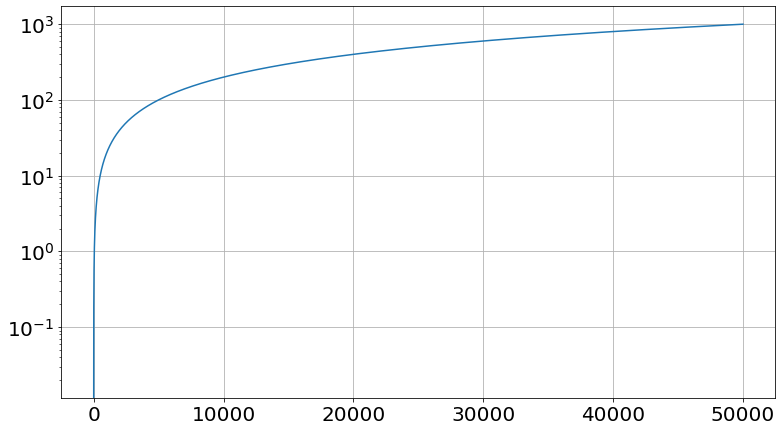

In [8]:
plt.plot(np.linspace(0.0, 1000, 50000))
plt.yscale('log')
plt.grid()
